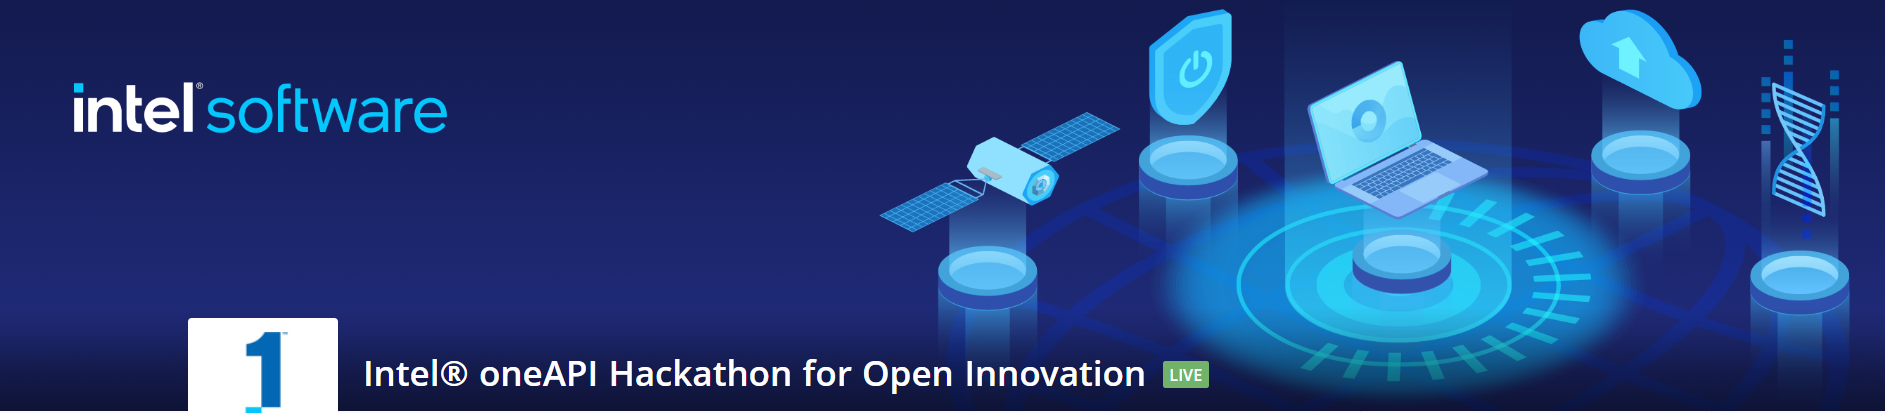

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> IntelTensorflow API Installation </font></h3>

In [1]:
pip install tensorflow-intel

  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached flatbuffers-23.1.21-py2.py3-none-any.whl (26 kB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
Note: you may need to restart the kernel to use 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
intel-tensorflow 2.9.1 requires flatbuffers<2,>=1.12, but you have flatbuffers 23.1.21 which is incompatible.
intel-tensorflow 2.9.1 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.11.0 which is incompatible.
intel-tensorflow 2.9.1 requires tensorboard<2.10,>=2.9, but you have tensorboard 2.11.2 which is incompatible.
intel-tensorflow 2.9.1 requires tensorflow-estimator<2.10.0,>=2.9.0rc0, but you have tensorflow-estimator 2.11.0 which is incompatible.


In [1]:
pip install --upgrade intel-extension-for-tensorflow[cpu]

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


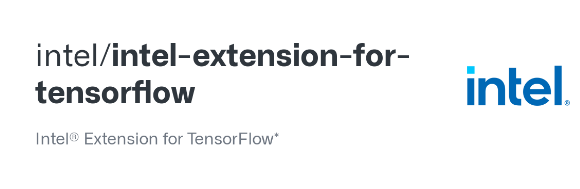

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Importing all the libraries </font></h3>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import glob
import cv2
import numpy as np
import math 
import datetime
import time
import random
import gc
from tqdm import tqdm

In [4]:
import keras
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Activation, Flatten,Conv2D,MaxPooling2D 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import optimizers
from tensorflow.keras import applications 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [5]:
print(tf.__version__)
print(tf.config.list_physical_devices())

2.11.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


<hr style = "border-top: 3px solid black" >
<i>- Dividing the datset based on labels. train_0 contains all the images which are not infected with weed and train_1 contains all the images which are infected with weed and likewise for test data also.</i>

In [6]:
TRAIN_DIR = 'data/train' #Training Dataset Path
TEST_DIR = 'data/test'   #Testing Dataset Path

train_0 = [TRAIN_DIR + '/0' + '/' + '{}'.format(i)    
              for i in os.listdir(TRAIN_DIR + '/0')]  
train_1 = [TRAIN_DIR + '/1' + '/' + '{}'.format(i) 
              for i in os.listdir(TRAIN_DIR + '/1')]  


train_imgs = train_0 + train_1  
#random.shuffle(train_imgs)  # shuffle it randomly

In [7]:
#Getting Test Data -
test_0 = [TEST_DIR + '/0' + '/' + '{}'.format(i) 
              for i in os.listdir(TEST_DIR + '/0')]  
test_1 = [TEST_DIR + '/1' + '/' + '{}'.format(i) 
              for i in os.listdir(TEST_DIR + '/1')]  


test_imgs = test_0 + test_1 
random.shuffle(test_imgs)

<hr style = "border-top: 3px solid black" >
<i>- function to read and process the images to an acceptable format for our model</i>

In [8]:
nrows = 224
ncolumns = 224

#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    
    X = [] # images
    y = [] # labels
    
    for image in tqdm(list_of_images):
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), 
                            (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if '0' in image[:12]:
            y.append(0)
        elif '1' in image[:12]:
            y.append(1)
    
    return X, y

<hr style = "border-top: 3px solid black" >
<i> Reading images and labels from the training dataset </i>

In [9]:
X, y = read_and_process_image(train_imgs)

100%|█████████████████████████████████████████████████████████████████████████████| 1039/1039 [00:07<00:00, 131.79it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 46.76it/s]


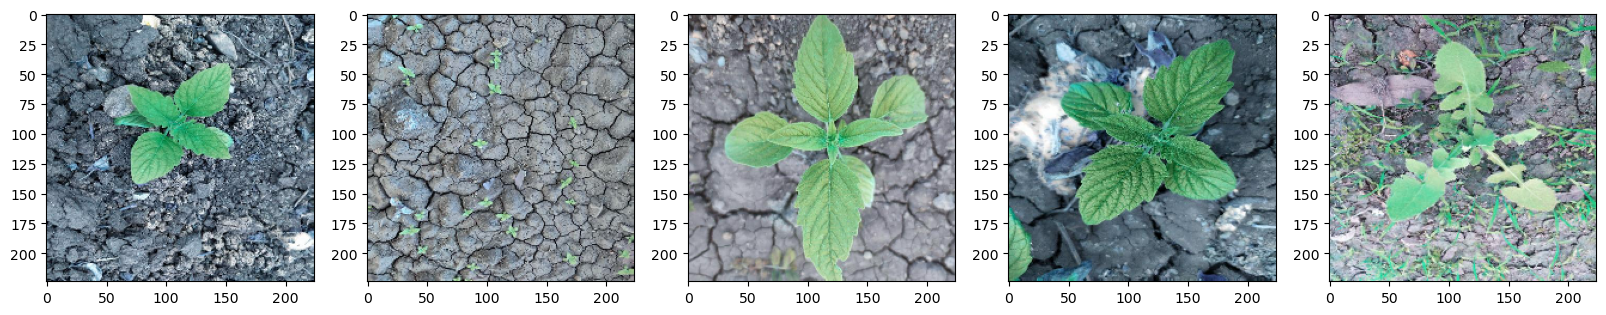

In [10]:
plt.figure(figsize=(20,10))
columns = 5
for i in tqdm(range(columns)):
    plt.subplot(5 // columns + 1, columns, i + 1)
    plt.imshow(X[i])

C:\Users\ashutoshvmadmin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Labels for No_Weed and Weed')

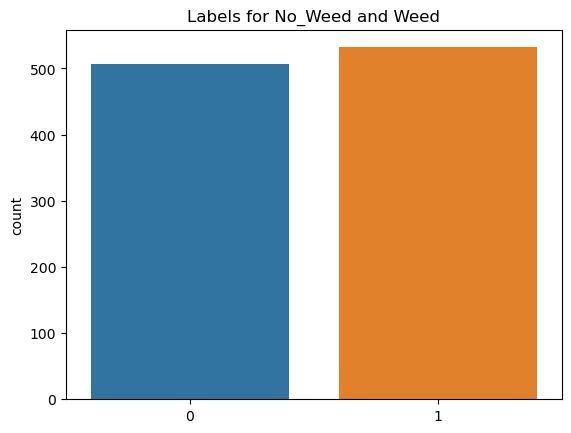

In [11]:
del train_imgs
gc.collect()

#Convert list to numpy array
X = np.array(X)
y = np.array(y)


#Lets plot the label to be sure we just have two class
sns.countplot(y)
plt.title('Labels for No_Weed and Weed')

<hr style = "border-top: 3px solid black" >

<h3><font color='blue'> Creating Training and Testing Data </font></h3>

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_val.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_val.shape)

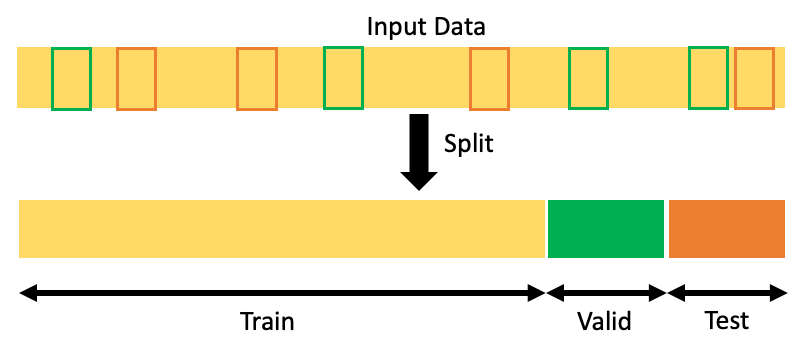

In [13]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

Shape of train images is: (1039, 224, 224, 3)
Shape of labels is: (1039,)


In [14]:
del X
del y
gc.collect()

#get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)
print(ntrain)
print(nval)

#We will use a batch size of 32. Note: batch size should be a factor of 2.***4,8,16,32,64...***
batch_size = 32

831
208


<h3><font color='blue'> Preparing our Initial Model for Training </font></h3>

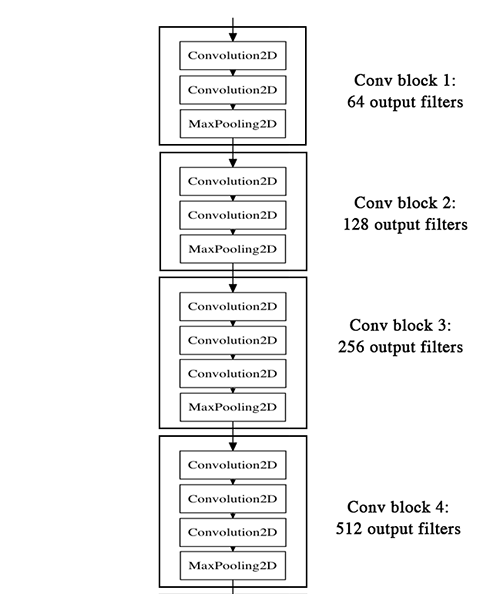


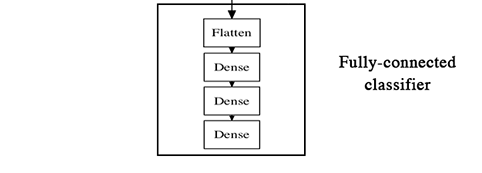

In [35]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))  #Dropout for regularization
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=50,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

#added
train_datagen = ImageDataGenerator(rescale=1./255   #Scale the image between 0 and 1
                                  )


val_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale

In [18]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Training our Initial Model </font></h3>

In [19]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=50,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

C:\Users\ashutoshvmadmin\AppData\Local\Temp\2\ipykernel_1980\1008497584.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/50
25/25 [==============================] - 24s 894ms/step - loss: 1.1702 - acc: 0.4981 - val_loss: 0.6895 - val_acc: 0.5208
Epoch 2/50
25/25 [==============================] - 22s 895ms/step - loss: 0.6942 - acc: 0.5019 - val_loss: 0.6872 - val_acc: 0.5365
Epoch 3/50
25/25 [==============================] - 23s 905ms/step - loss: 0.7580 - acc: 0.5257 - val_loss: 0.6935 - val_acc: 0.4792
Epoch 4/50
25/25 [==============================] - 23s 938ms/step - loss: 0.6936 - acc: 0.5820 - val_loss: 0.7331 - val_acc: 0.5312
Epoch 5/50
25/25 [==============================] - 23s 938ms/step - loss: 0.6754 - acc: 0.5970 - val_loss: 0.5516 - val_acc: 0.8750
Epoch 6/50
25/25 [==============================] - 23s 915ms/step - loss: 0.6581 - acc: 0.7259 - val_loss: 0.4477 - val_acc: 0.8490
Epoch 7/50
25/25 [==============================] - 22s 896ms/step - loss: 0.4954 - acc: 0.7950 - val_loss: 0.5159 - val_acc: 0.7865
Epoch 8/50
25/25 [==============================] - 23s 910ms/step - 

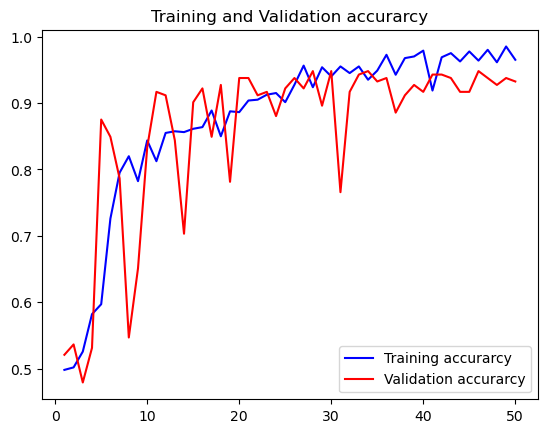

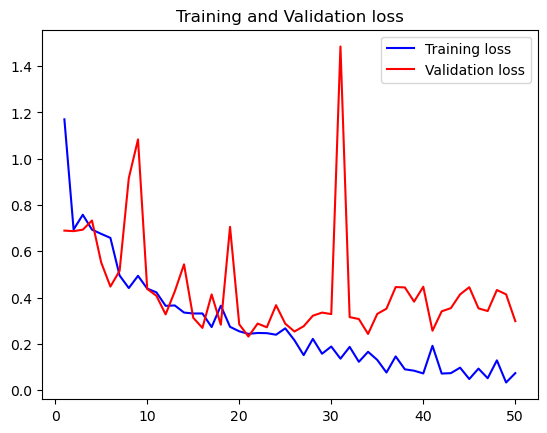

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()



plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [22]:
X_test, y_test = read_and_process_image(test_imgs) #Y_test in this case will be empty.
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

100%|████████████████████████████████████████████████████████████████████████████████| 261/261 [00:03<00:00, 76.21it/s]


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Validating our Initial Model </font></h3>

In [23]:
out = model.evaluate_generator(val_generator)
print(out)

C:\Users\ashutoshvmadmin\AppData\Local\Temp\2\ipykernel_1980\4193496103.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  out = model.evaluate_generator(val_generator)


[0.32266777753829956, 0.932692289352417]


In [24]:
Y_pred = model.predict(X_val)
print(Y_pred.shape)
#y_pred = np.argmax(Y_pred, axis=1) - used for multiclass
y_pred = (Y_pred > 0.5) * 1.0
y_pred = y_pred.reshape(y_val.shape)
y_pred.sum()

7/7 [==============================] - 2s 194ms/step
(208, 1)


104.0

1/1 [==============================] - 0s 50ms/step


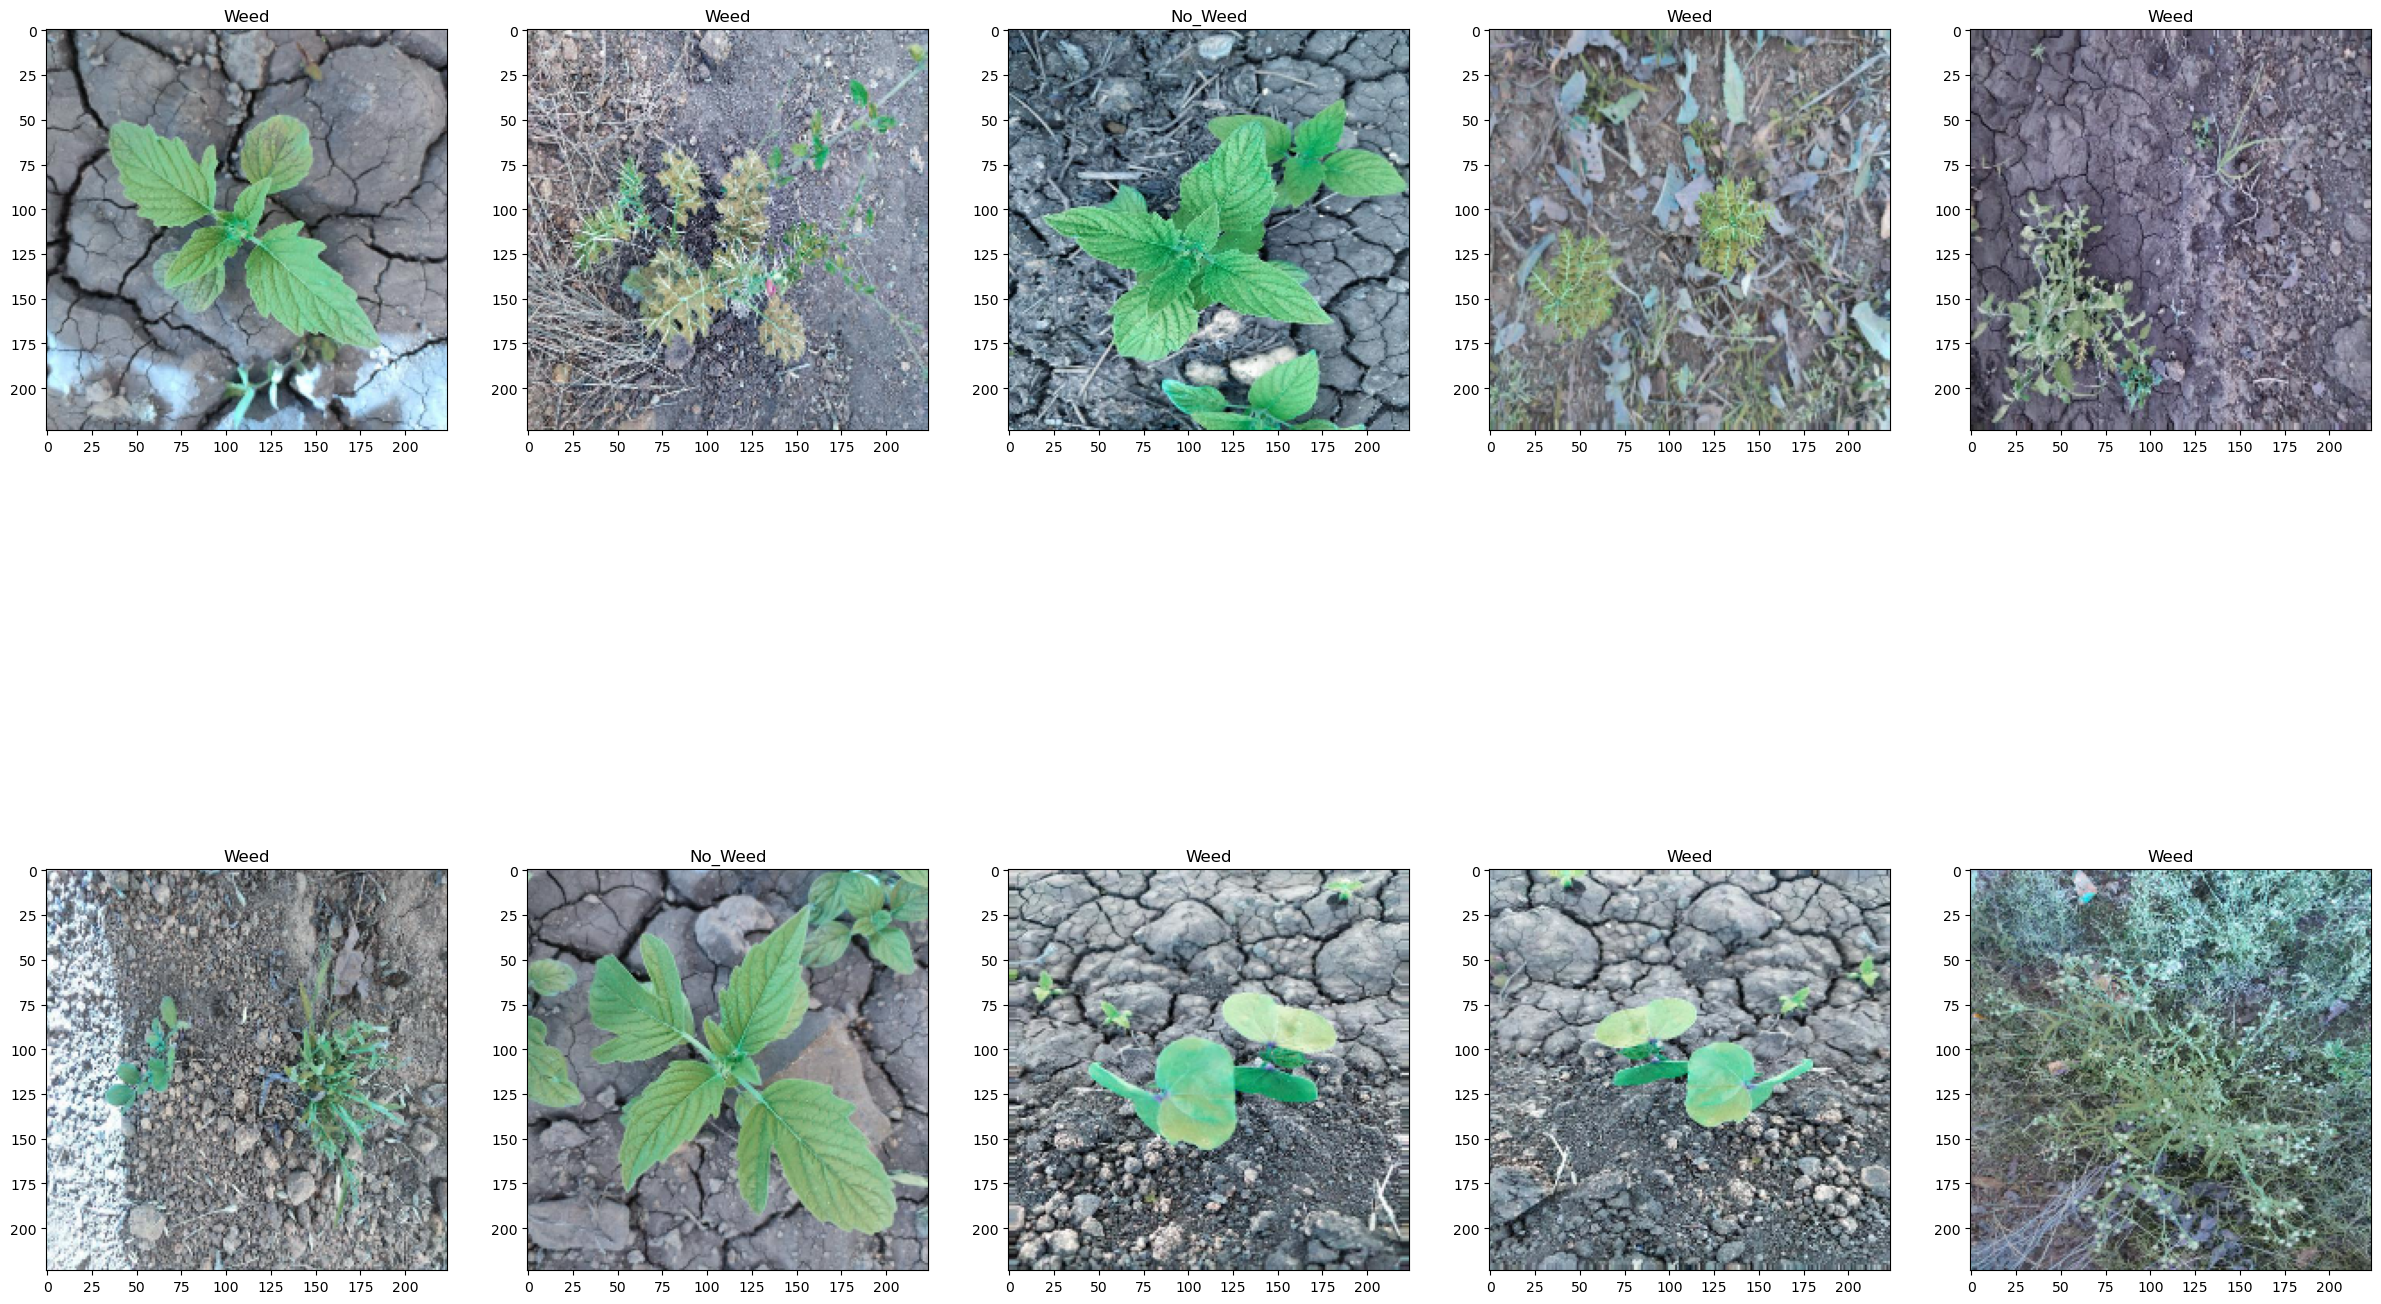

In [25]:
i = 0
text_labels = []
plt.figure(figsize=(30,20))

for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('Weed')
    else:
        text_labels.append('No_Weed')
    plt.subplot(5 // columns + 1, columns, i + 1)
    plt.title(text_labels[i])
    #print(batch[0])
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()

In [26]:
print('Confusion Matrix')
print(confusion_matrix(y_val, y_pred))


print('Classification Report')
target_names = ['Weed', 'No Weed']
print(classification_report(y_val, y_pred,target_names=target_names))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_val, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_val, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_val, y_pred)
print('F1 score: %f' % f1)

Confusion Matrix
[[ 96   3]
 [  8 101]]
Classification Report
              precision    recall  f1-score   support

        Weed       0.92      0.97      0.95        99
     No Weed       0.97      0.93      0.95       109

    accuracy                           0.95       208
   macro avg       0.95      0.95      0.95       208
weighted avg       0.95      0.95      0.95       208

Accuracy: 0.947115
Precision: 0.971154
Recall: 0.926606
F1 score: 0.948357


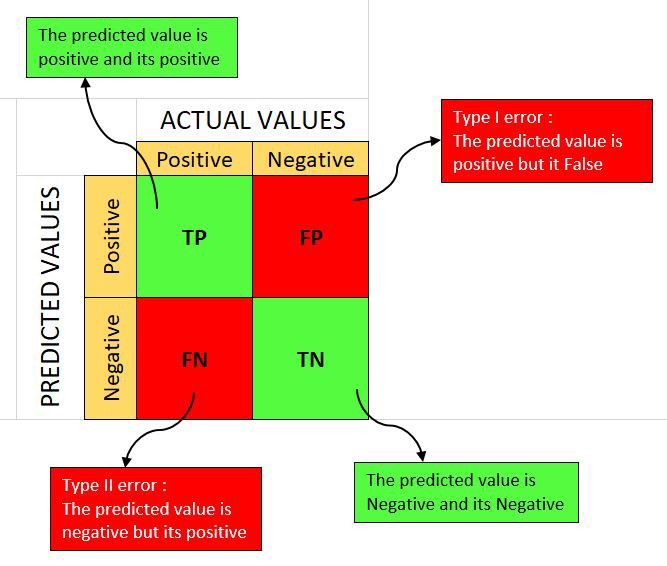

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Transfer Learning </font></h3>

<i>- Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task.
Transfer learning can be used when the dataset is small, by using a pre-trained model on similar images we can easily achieve high performance.</i>

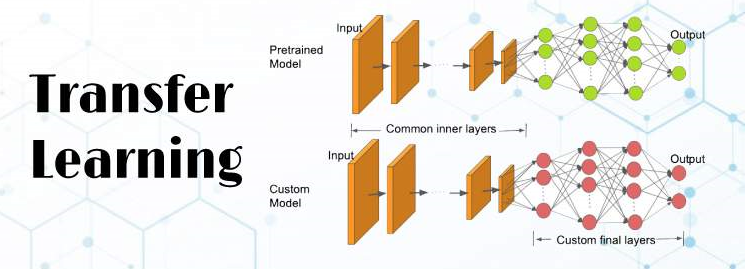

In [27]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

In [28]:
base_model.trainable = False

In [29]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(1, activation="sigmoid")                                     
                                ])

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Training our Final Model </font></h3>

In [30]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs = 50 , validation_data = (X_val, y_val))

Epoch 1/50
26/26 [==============================] - 17s 540ms/step - loss: 0.6164 - accuracy: 0.6871 - val_loss: 0.4083 - val_accuracy: 0.8750
Epoch 2/50
26/26 [==============================] - 13s 494ms/step - loss: 0.3940 - accuracy: 0.8568 - val_loss: 0.3131 - val_accuracy: 0.8990
Epoch 3/50
26/26 [==============================] - 13s 494ms/step - loss: 0.3478 - accuracy: 0.8676 - val_loss: 0.3154 - val_accuracy: 0.8894
Epoch 4/50
26/26 [==============================] - 13s 497ms/step - loss: 0.3333 - accuracy: 0.8797 - val_loss: 0.2601 - val_accuracy: 0.9038
Epoch 5/50
26/26 [==============================] - 13s 497ms/step - loss: 0.3049 - accuracy: 0.8893 - val_loss: 0.2454 - val_accuracy: 0.9087
Epoch 6/50
26/26 [==============================] - 13s 493ms/step - loss: 0.2894 - accuracy: 0.8989 - val_loss: 0.2402 - val_accuracy: 0.9135
Epoch 7/50
26/26 [==============================] - 13s 491ms/step - loss: 0.2763 - accuracy: 0.9001 - val_loss: 0.2298 - val_accuracy: 0.9231

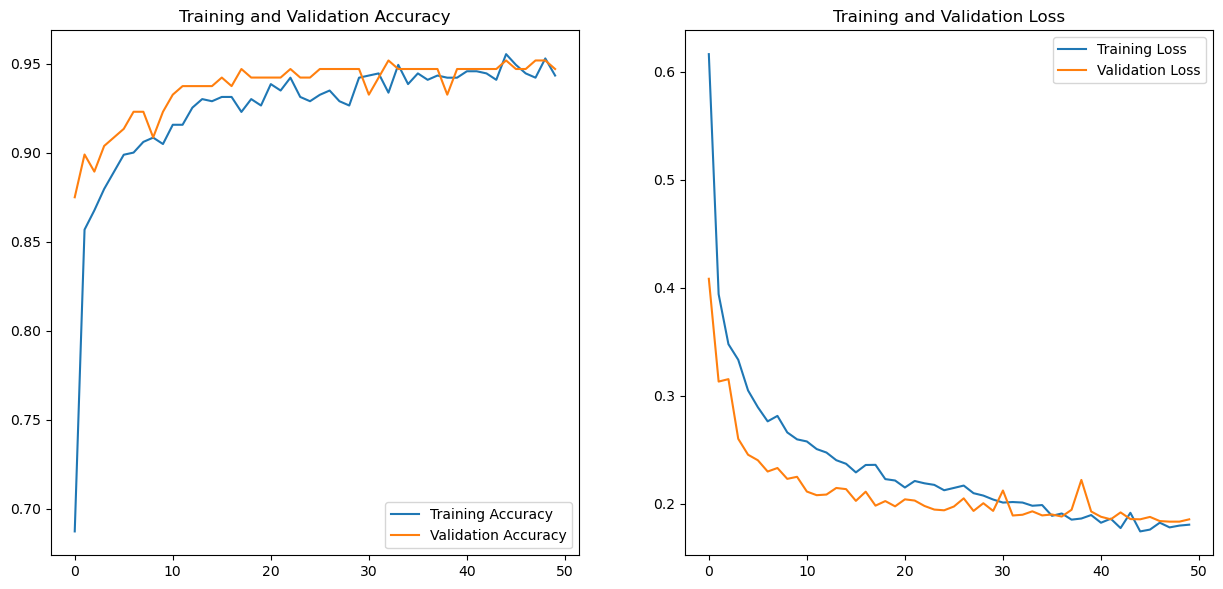

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
#Train and validation accuracy
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Train and validation loss
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Calculating all the Evaluation Metrics </font></h3>

In [32]:
predictions = model.predict(X_val)
predictions = predictions.reshape(-1)

for i in range(len(predictions)):
    if predictions[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

print(classification_report(y_val, predictions, target_names = ['No Weed (Class 0)','Weed (Class 1)']))

7/7 [==============================] - 3s 363ms/step
                   precision    recall  f1-score   support

No Weed (Class 0)       0.92      0.97      0.95        99
   Weed (Class 1)       0.97      0.93      0.95       109

         accuracy                           0.95       208
        macro avg       0.95      0.95      0.95       208
     weighted avg       0.95      0.95      0.95       208



<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Confusion Metrics </font></h3>

In [42]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_val, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

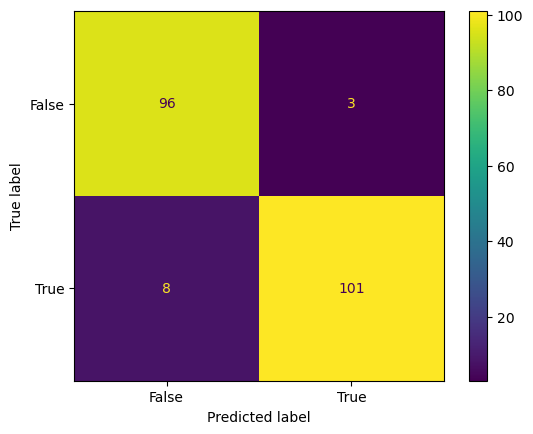

In [43]:
cm_display.plot()
plt.show()

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Weed Detection Assignment Summary </font></h3>

<h3><font color='blue'> We are able to achieve F1 Score of 0.95 with this Model </font></h3>

In [44]:
f1 = f1_score(y_val, predictions)

In [45]:
from IPython.display import Markdown, display

f1_text = f"**F1 Score:** {f1:.2f}"
display(Markdown(f1_text))

**F1 Score:** 0.95